# CMIP global climate models

<b>Table of Contents</b>

- Overview
- Setup
    - Get authentication token
- Data layers
    - Data layer dimensions
- Querying the data layers
    - Point query
    - Raster query
- References


## Overview

The Coupled Model Intercomparison Project (CMIP6) protocol was endorsed in 2014 and consists of global climate simulations from around 100 distinct climate models being produced across 49 different modeling groups. CMIP6 represents a substantial expansion over CMIP5, in terms of the number of modeling groups participating, a new set of emissions scenarios driven by different socioeconomic assumptions have been developed called Shared Socioeconomic Pathways (SSPs) which drive the climate models for CMIP6.

Let us get a practical understanding about this dataset and its usage through this tutorial.

## Setup

Before starting, you have to install IBM EI Geospatial python SDK i.e ibmpairs and other modules needed to run this sample ,mentioned in the cell below.

<b>Note:</b> To run this notebook seamlessly, you have to first configure your Geospatial APIs' credentials in a file named `secrets.ini` in the below format:

```
[EI]
api.api_key = <Your Geospatial APIs API key>
api.tenant_id = <Your Geospatial APIs Tenant ID>
api.org_id = <Your Geospatial APIs Org ID>
```

Keep the secrets.ini file at an appropriate relative location of this notebook. For example, as specified in the below config.

```config.read('../../../../auth/secrets.ini')```

In [ ]:
%pip install ibmpairs
%pip install configparser
%pip install matplotlib
%pip install ipyplot

In [2]:
import ibmpairs.client as client
import ibmpairs.catalog as catalog
import ibmpairs.query as query
import pandas as pd
import configparser
import json
import numpy as np
from PIL import Image as PILImage
from IPython.display import Image, display
import matplotlib.pyplot as plt
import os
from datetime import datetime
from dateutil.relativedelta import relativedelta

Now, we shall create a client object using the API_KEY, TENANT_ID (or CLIENT_ID) and ORG_ID to create an authenticated HTTP client Authentication token using 'ibmpairs.client' module, to use it in the subsequent steps.

### Get authentication token

In [3]:
config = configparser.RawConfigParser()
config.read('../../../../auth/secrets.ini')
# Best practice is not to include secrets in source code so we read
# an api key, tenant id and org id from a secrets.ini file.
# You could set the credentials in-line here but we don't
# recommend it for security reasons.

EI_API_KEY    = config.get('EI', 'api.api_key')
EI_TENANT_ID  = config.get('EI', 'api.tenant_id') 
EI_ORG_ID     = config.get('EI', 'api.org_id')  

EI_client_v3  = client.get_client(api_key   = EI_API_KEY,
                                    tenant_id = EI_TENANT_ID,
                                    org_id    = EI_ORG_ID,
                                    legacy    = False,
                                    version   = 3
                                   )

2025-04-21 16:01:41 - paw - INFO - The client authentication method is assumed to be OAuth2.
2025-04-21 16:01:41 - paw - INFO - Legacy Environment is False
2025-04-21 16:01:41 - paw - INFO - The authentication api key type is assumed to be IBM EIS, because the api key prefix 'PHX' is present.
2025-04-21 16:01:43 - paw - INFO - Authentication success.
2025-04-21 16:01:43 - paw - INFO - HOST: https://api.ibm.com/geospatial/run/na/core/v3


## Data layers

We would start by querying the ibmpairs catalog to retrieve the Data Set ID and the Data Layers that form the Data Set.

In [4]:
pd.set_option('display.max_colwidth', None)
search_df=catalog.search("CMIP global climate models")
search_df[['dataset_id','data_layer_id','data_layer_name','data_layer_description_short','data_layer_level','data_layer_type','data_layer_unit','data_set_name','data_set_description_short']]

dataset_id data_layer_id               data_layer_name  \
0         565         56521       EC-Earth3 ssp585 tasmax   
1         565         56522      EC-Earth3 ssp585 sfcWind   
2         565         56523         EC-Earth3 ssp585 hurs   
3         565         56510      EC-Earth3 historical tas   
4         565         56511   EC-Earth3 historical tasmax   
5         565         56512   EC-Earth3 historical tasmin   
6         565         56513       EC-Earth3 historical pr   
7         565         56514     EC-Earth3 historical huss   
8         565         56515     EC-Earth3 historical rsds   
9         565         56518       EC-Earth3 ssp585 tasmin   
10        565         56519          EC-Earth3 ssp585 tas   
11        565         56520         EC-Earth3 ssp585 rsds   
12        565         56524           EC-Earth3 ssp585 pr   
13        565         56525         EC-Earth3 ssp585 rlds   
14        565         56526         EC-Earth3 ssp585 huss   
15        565         56516     EC-Earth3 historical rlds   
16        565         56517  EC-Earth3 historical sfcWind   
17        565         56500           EC-Earth3 ssp126 pr   
18        565         56501      EC-Earth3 ssp126 sfcWind   
19        565         56502         EC-Earth3 ssp126 huss   
20        565         56503         EC-Earth3 ssp126 hurs   
21        565         56504          EC-Earth3 ssp126 tas   
22        565         56505         EC-Earth3 ssp126 rlds   
23        565         56506       EC-Earth3 ssp126 tasmin   
24        565         56507       EC-Earth3 ssp126 tasmax   
25        565         56508         EC-Earth3 ssp126 rsds   
26        565         56509     EC-Earth3 historical hurs   

                                                                                                                                                                  data_layer_description_short  \
0                              EC-Earth3 daily ssp585 tasmax: Daily Maximum Near-Surface Air Temperature (K) from CMIP6 experiment: 2015-2100. Data derived from member_id r1i1p1f1 by default   
1                                   EC-Earth3 daily ssp585 sfcWind: Daily-Mean Near-Surface Wind Speed (m/s) from CMIP6 experiment: 2015-2100. Data derived from member_id r1i1p1f1 by default   
2                                       EC-Earth3 daily ssp585 hurs: Near-Surface Relative Humidity (%) from CMIP6 experiment: 2015-2100. Data derived from member_id r1i1p1f1_v1.1 by default   
3                        EC-Earth3 daily historical tas: Daily Near-Surface Air Temperature (K) from CMIP6 experiment: HISTORICAL (1950-2014). Data derived from member_id r1i1p1f1 by default   
4             EC-Earth3 daily historical tasmax: Daily Maximum Near-Surface Air Temperature (K) from CMIP6 experiment: HISTORICAL (1950-2014). Data derived from member_id r1i1p1f1 by default   
5             EC-Earth3 daily historical tasmin: Daily Minimum Near-Surface Air Temperature (K) from CMIP6 experiment: HISTORICAL (1950-2014). Data derived from member_id r1i1p1f1 by default   
6            EC-Earth3 daily historical pr: Mean of the daily precipitation rate (kg/m²/s) from CMIP6 experiment: HISTORICAL (1950-2014). Data derived from member_id r1i1p1f1_v1.1 by default   
7   EC-Earth3 daily historical huss: Near-Surface Specific Humidity dimensionless ratio (kg/kg) from CMIP6 experiment: HISTORICAL (1950-2014). Data derived from member_id r1i1p1f1 by default   
8               EC-Earth3 daily historical rsds: Surface Downwelling Shortwave Radiation (W/m²) from CMIP6 experiment: HISTORICAL (1950-2014). Data derived from member_id r1i1p1f1 by default   
9                              EC-Earth3 daily ssp585 tasmin: Daily Minimum Near-Surface Air Temperature (K) from CMIP6 experiment: 2015-2100. Data derived from member_id r1i1p1f1 by default   
10                                        EC-Earth3 daily ssp585 tas: Daily Near-Surface Air Temperature (K) from CMIP6 experiment: 2015-2100. Data derived from

As seen above, the CMIP global climate models Data Set of ID 565 has twenty six Data Layers. The naming of the Data Layers follows the convention of `Model_Name Scenario Variable`. For example, for Data Layer EC-Earth3 ssp126 pr, EC-Earth3 is `Model_Name`, ssp126 is `Scenario` and pr is `Variable`.

- `Model_Name` refers to a specific global climate model developed by the EC-Earth Consortium. In this case, EC-Earth3 is the third version of the EC-Earth model, which is a coupled climate system model that simulates interactions between the atmosphere, oceans, land surface, and ice.
- `Scenario` refers to a specific Shared Socioeconomic Pathway (SSP) scenario. SSPs are used in CMIP6 to explore different future pathways based on varying levels of greenhouse gas emissions, socioeconomic developments, and climate policy actions. In this case, SSP126 corresponds to a "low-emissions" scenario where global greenhouse gas emissions peak in the 2020s and then decline significantly, aligning with more ambitious climate mitigation efforts.
- `Variable` refers to the climate variable or field that the model is simulating. These are the physical quantities output by the model that describe different aspects of the climate system:
  - `pr` refers to precipitation. This variable represents the amount of precipitation that falls on the Earth’s surface, including both rain and snow.
  - `sfcWind` refers to surface wind speed. This variable represents the wind at or near the Earth’s surface.
  - `huss` refers to surface specific humidity. It represents the amount of water vapor in the air near the Earth’s surface.
  - `hurs` refers to surface relative humidity. This variable represents the percentage of the maximum amount of water vapor the air can hold at a given temperature.
  - `rlds` refers to downward longwave radiation. This is the radiation emitted from the Earth’s surface and atmosphere back toward the surface, including infrared radiation (heat).
  - `tasmin` refers to the minimum daily temperature at the surface. This is the lowest temperature observed during a 24-hour period.
  - `tasmax` refers to the maximum daily temperature at the surface. This is the highest temperature observed during a 24-hour period.
  - `rsds` refers to downward shortwave radiation. This is the incoming solar radiation reaching the Earth’s surface

Each of the Data Layers are identified by a unique Data Layer ID. To gain a better understanding of the Data Set and its geospatial and temporal coverage as well as other relevant metadata, we can make further queries to the ibmpairs catalog submodule as mentioned in the [tutorials](https://ibm.github.io/ibmpairs/tutorials/quickstart/quickstartcatalog.html).

### Data layer dimensions
Every Data Layer of the CMIP6 Data Set has `member_id` as it's dimension which refers to a specific identifier that is used to distinguish between different realizations or ensemble members of a given climate model experiment. The ensemble members are crucial for the analysis of model uncertainty and for understanding the variability across different realizations of a given scenario. The dimension values represent a specific ensemble member from a CMIP (Coupled Model Intercomparison Project) simulation, often used in climate model data. 

This string encodes information about several aspects of the model run, including the realization, initialization, physics version, and forcing scenario. For example, in `r1i1p1f1_v1.2` `r1` means the first realization of the ensemble, `i1` means the first set of initialization conditions, `p1` means the first set of physical parameterizations used in the model, `f1` typically corresponds to the first forcing scenario, in this case related to SSP126 and the version `v1.2` indicates the second version of the model, which might include updates or refinements to the physics, initialization, or forcing scenarios.The combination of these indices allows researchers to track and differentiate between various model runs, ensuring that they know exactly what conditions, parameterizations, and versions were used for each ensemble member in the dataset.

For more understanding of the CMIP global climate models  Data Layer Dimensions, we can make further queries to the ibmpairs catalog submodule as mentioned in the [tutorials](https://ibm.github.io/ibmpairs/tutorials/quickstart/quickstartcatalog.html).

Refer the table below for CMIP global climate models Data Layers and its Dimensions. 

#### List of the data layer dimensions

<div style="display: inline-block">
    
| Data Layer ID | Data Layer Name            | Dimensions |Dimensions Values|
|:---------------|:---------------------------|:---------     |:-----------------|
| 56500         | EC-Earth3 ssp126 pr         |   member_id   |  r1i1p1f1_v1.1   | 
| 56501         | EC-Earth3 ssp126 sfcWind    |   member_id   |  r1i1p1f1        |
| 56502         | EC-Earth3 ssp126 huss       |   member_id   |  r1i1p1f1        | 
| 56503         | EC-Earth3 ssp126 hurs       |   member_id   |  r1i1p1f1_v1.1   | 
| 56504         | EC-Earth3 ssp126 tas        |   member_id   |  r1i1p1f1_v1.1   | 
| 56505         | EC-Earth3 ssp126 rlds       |   member_id   |  r1i1p1f1        | 
| 56506         | EC-Earth3 ssp126 tasmin     |   member_id   |  r1i1p1f1_v1.2   | 
| 56507         | EC-Earth3 ssp126 tasmax     |   member_id   |  r1i1p1f1        | 
| 50508         | EC-Earth3 ssp126 rsds       |   member_id   |  r1i1p1f1        | 
| 50509         | EC-Earth3 historical hurs   |   member_id   |  r1i1p1f1_v1.1   |
| 50510         | EC-Earth3 historical tas    |   member_id   |  r1i1p1f1        |
| 50511         | EC-Earth3 historical tasmax |   member_id   |  r1i1p1f1        |
| 50512         | EC-Earth3 historical tasmin |   member_id   |  r1i1p1f1        |
| 50513         | EC-Earth3 historical pr     |   member_id   |  r1i1p1f1_v1.1   |
| 50514         | EC-Earth3 historical huss   |   member_id   |  r1i1p1f1        |
| 50515         | EC-Earth3 historical rsds   |   member_id   |  r1i1p1f1        |
| 50516         | EC-Earth3 historical rlds   |   member_id   |  r1i1p1f1        |
| 50517         | EC-Earth3 historical sfcWind|   member_id   |  r1i1p1f1        |
| 50518         | EC-Earth3 ssp585 tasmin     |   member_id   |  r1i1p1f1        |
| 50519         | EC-Earth3 ssp585 tas        |   member_id   |  r1i1p1f1        |
| 50520         | EC-Earth3 ssp585 rsds       |   member_id   |  r1i1p1f1        |
| 50521         | EC-Earth3 ssp585 tasmax     |   member_id   |  r1i1p1f1        |
| 50522         | EC-Earth3 ssp585 sfcWind    |   member_id   |  r1i1p1f1        |
| 50523         | EC-Earth3 ssp585 hurs       |   member_id   |  r1i1p1f1_v1.1   |
| 50524         | EC-Earth3 ssp585 pr         |   member_id   |  r1i1p1f1_v1.1   |
| 50525         | EC-Earth3 ssp585 rlds       |   member_id   |  r1i1p1f1        |
| 50526         | EC-Earth3 ssp585 huss       |   member_id   |  r1i1p1f1        |

## Querying the data layers
### Point query
Next, let us make a point query for two different locations that provides essential information to analyze and understand various climate phenomena. We can give a list of the Data Layers of CMIP6 Data Set in the form of Data Layer Id, the point coordinates of the locations, temporal period and the respective Data Layer Dimension value to observe the climate projections in the specified locations.

In [5]:
query_result = query.submit(
    {
        "layers" : [
            {
                "type" : "raster", 
                "id" : "56500",
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1_v1.1" }]
            },
            {
                "type" : "raster",
                "id" : "56501",
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56502", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56503", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1_v1.1" }]
            },
            {
                "type" : "raster",
                "id" : "56504", 
                "dimensions": [{ "name": "member_id","value": "r1i1p1f1_v1.1" }]
            },
            {
                "type" : "raster",
                "id" : "56505",
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56506", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1_v1.2" }]
            },
            {
                "type" : "raster",
                "id" : "56507",
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56508", 
                "dimensions": [{ "name": "member_id","value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56509", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1_v1.1" }]
            },
            {
                "type" : "raster",
                "id" : "56510", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56511", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56512", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56513", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1_v1.1" }]
            },
            {
                "type" : "raster",
                "id" : "56514", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56515", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56516", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56517", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56518", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56519", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56520", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56521", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56522", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56523", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1_v1.1" }]
            },
            {
                "type" : "raster",
                "id" : "56524", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1_v1.1" }]
            },
            {
                "type" : "raster",
                "id" : "56525", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56526", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            }
        ],
        "spatial" : {
            "type" : "point",
            "coordinates": [
                # 12.835474, 77.582174,   #India
                46.487854, 2.076227,    #France
            ]
        },
        "temporal" : {
            "intervals" : [
                {
                    "start" : "2027-08-01T00:00:00Z", 
                    "end" : "2027-08-01T23:59:59Z"
                },
                {
                    "start" : "2014-08-01T00:00:00Z", 
                    "end" : "2014-08-01T23:59:59Z"
                },
            ]
        }
    }, client=EI_client_v3)

# Convert the results to a dataframe
point_df = query_result.point_data_as_dataframe()
point_df['value'] = point_df['value'].apply(lambda x: '{:.6f}'.format(float(x)))
point_df['datetime'] = pd.to_datetime(point_df['timestamp'] , unit='ms', errors = 'coerce')
point_df['datetime'] = point_df['datetime'].dt.strftime('%Y-%m-%dT%H:%M:%SZ')
point_df = point_df.drop(columns=['timestamp'])
point_df

2025-04-21 16:09:01 - paw - INFO - TASK: submit STARTING.
2025-04-21 16:09:08 - paw - INFO - TASK: submit COMPLETED.


layer_id                    layer_name                     dataset  \
0      56500           EC-Earth3 ssp126 pr  CMIP global climate models   
1      56501      EC-Earth3 ssp126 sfcWind  CMIP global climate models   
2      56502         EC-Earth3 ssp126 huss  CMIP global climate models   
3      56503         EC-Earth3 ssp126 hurs  CMIP global climate models   
4      56504          EC-Earth3 ssp126 tas  CMIP global climate models   
5      56505         EC-Earth3 ssp126 rlds  CMIP global climate models   
6      56506       EC-Earth3 ssp126 tasmin  CMIP global climate models   
7      56507       EC-Earth3 ssp126 tasmax  CMIP global climate models   
8      56508         EC-Earth3 ssp126 rsds  CMIP global climate models   
9      56509     EC-Earth3 historical hurs  CMIP global climate models   
10     56510      EC-Earth3 historical tas  CMIP global climate models   
11     56511   EC-Earth3 historical tasmax  CMIP global climate models   
12     56512   EC-Earth3 historical tasmin  CMIP global climate models   
13     56513       EC-Earth3 historical pr  CMIP global climate models   
14     56514     EC-Earth3 historical huss  CMIP global climate models   
15     56515     EC-Earth3 historical rsds  CMIP global climate models   
16     56516     EC-Earth3 historical rlds  CMIP global climate models   
17     56517  EC-Earth3 historical sfcWind  CMIP global climate models   
18     56518       EC-Earth3 ssp585 tasmin  CMIP global climate models   
19     56519          EC-Earth3 ssp585 tas  CMIP global climate models   
20     56520         EC-Earth3 ssp585 rsds  CMIP global climate models   
21     56521       EC-Earth3 ssp585 tasmax  CMIP global climate models   
22     56522      EC-Earth3 ssp585 sfcWind  CMIP global climate models   
23     56523         EC-Earth3 ssp585 hurs  CMIP global climate models   
24     56524           EC-Earth3 ssp585 pr  CMIP global climate models   
25     56525         EC-Earth3 ssp585 rlds  CMIP global climate models   
26     56526         EC-Earth3 ssp585 huss  CMIP global climate models   

    longitude   latitude       value                 property  \
0    2.076227  46.487854    0.000000  member_id:r1i1p1f1_v1.1   
1    2.076227  46.487854    1.515937       member_id:r1i1p1f1   
2    2.076227  46.487854    0.012735       member_id:r1i1p1f1   
3    2.076227  46.487854   72.074944  member_id:r1i1p1f1_v1.1   
4    2.076227  46.487854  296.205627  member_id:r1i1p1f1_v1.1   
5    2.076227  46.487854  353.330872       member_id:r1i1p1f1   
6    2.076227  46.487854  290.315765  member_id:r1i1p1f1_v1.2   
7    2.076227  46.487854  302.095520       member_id:r1i1p1f1   
8    2.076227  46.487854  299.006927       member_id:r1i1p1f1   
9    2.076227  46.487854   60.544876  member_id:r1i1p1f1_v1.1   
10   2.076227  46.487854  294.830139       member_id:r1i1p1f1   
11   2.076227  46.487854  303.391113       member_id:r1i1p1f1   
12   2.076227  46.487854  286.269196       member_id:r1i1p1f1   
13   2.076227  46.487854    0.000000  member_id:r1i1p1f1_v1.1   
14   2.076227  46.487854    0.010091       member_id:r1i1p1f1   
15   2.076227  46.487854  338.039368       member_id:r1i1p1f1   
16   2.076227  46.487854  339.314636       member_id:r1i1p1f1   
17   2.076227  46.487854    2.180594       member_id:r1i1p1f1   
18   2.076227  46.487854  291.542908       member_id:r1i1p1f1   
19   2.076227  46.487854  297.156799       member_id:r1i1p1f1   
20   2.076227  46.487854  269.615204       member_id:r1i1p1f1   
21   2.076227  46.487854  302.770691       member_id:r1i1p1f1   
22   2.076227  46.487854    2.255410       member_id:r1i1p1f1   
23   2.076227  46.487854   90.954445  member_id:r1i1p1f1_v1.1   
24   2.076227  46.487854    0.000136  member_id:r1i1p1f1_v1.1   
25   2.076227  46.487854  389.624298       member_id:r1i1p1f1   
26   2.076227  46.487854    0.017123       member_id:r1i1p1f1   

                datetime  
0   2027-08-01T00:00:00Z  
1   2027-08-01T00:00:00Z  
2   2027-08-01T00:00:00Z  
3 

We see above, the values for different climate variables that are obtained for france location and dates we queried for. For instance, for the location 12.835474,77.582174 that we queried for, on 01/08/2015 resulted in the value 0.000133 mm for the Data Layer 'EC-Earth3 ssp126 pr' corresponding to precipitation with Data Layer ID as 56500 for the dimension r1i1p1f1_v1.1.

Note: The comments within the query JSON, intended for descriptive purposes, may cause compatibility issues in other programming languages and should be removed when using the data in those contexts.

### Raster query
Next, we shall make a raster query for a square area to observe it's climatic characteristics. 

In [6]:
cmip6_result = query.submit_check_status_and_download(
    {
        "publish": True,
        "name": "CMIP Global Climate Models analysis for a region in Asia",
        "spatial": {
            "type": "square",
            "coordinates": [
                26.350434, 58.726672,
                51.742015, 91.307494
            ]
        },
        "temporal": {
            "intervals": [
                  {
                    "start": "2070-08-06T00:00:00Z",
                    "end": "2070-08-06T00:00:00Z"
                  },
                  {
                    "start" : "2014-08-01T00:00:00Z", 
                    "end" : "2014-08-01T23:59:59Z"
                }
            ]
        },
        "layers" : [
            {
                "type" : "raster",
                "id" : "56500",
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1_v1.1" }]
            },
            {
                "type" : "raster",
                "id" : "56501",
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56502", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56503", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1_v1.1" }]
            },
            {
                "type" : "raster",
                "id" : "56504", 
                "dimensions": [{ "name": "member_id","value": "r1i1p1f1_v1.1" }]
            },
            {
                "type" : "raster",
                "id" : "56505",
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56506", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1_v1.2" }]
            },
            {
                "type" : "raster",
                "id" : "56507",
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56508", 
                "dimensions": [{ "name": "member_id","value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56509", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1_v1.1" }]
            },
            {
                "type" : "raster",
                "id" : "56510", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56511", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56512", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56513", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1_v1.1" }]
            },
            {
                "type" : "raster",
                "id" : "56514", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56515", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56516", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56517", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56518", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56519", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56520", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56521", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56522", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56523", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1_v1.1" }]
            },
            {
                "type" : "raster",
                "id" : "56524", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1_v1.1" }]
            },
            {
                "type" : "raster",
                "id" : "56525", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56526", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            }
            
        ]
    }, client=EI_client_v3)

2025-04-21 16:10:04 - paw - INFO - TASK: submit_check_status_and_download STARTING.
2025-04-21 16:10:07 - paw - INFO - The query was successfully submitted with the id: 1745193600_38407075.
2025-04-21 16:10:08 - paw - INFO - The query 1745193600_38407075 has the status Queued.
2025-04-21 16:10:39 - paw - INFO - The query 1745193600_38407075 has the status Running.
2025-04-21 16:11:10 - paw - INFO - The query 1745193600_38407075 has the status Running.
2025-04-21 16:11:41 - paw - INFO - The query 1745193600_38407075 has the status Running.
2025-04-21 16:12:12 - paw - INFO - The query 1745193600_38407075 has the status Succeeded.
2025-04-21 16:12:12 - paw - INFO - The query 1745193600_38407075 was successful after checking the status.
2025-04-21 16:12:43 - paw - INFO - The query 1745193600_38407075 has the status Succeeded.
2025-04-21 16:12:43 - paw - INFO - The query 1745193600_38407075 was successful after checking the status.
2025-04-21 16:12:43 - paw - WARNING - The query download fo

The query takes a few seconds to complete and downloads the output as a zip file in the /download folder within the same location as this notebook. Now we shall display the resultant tiffs using the following utility function.

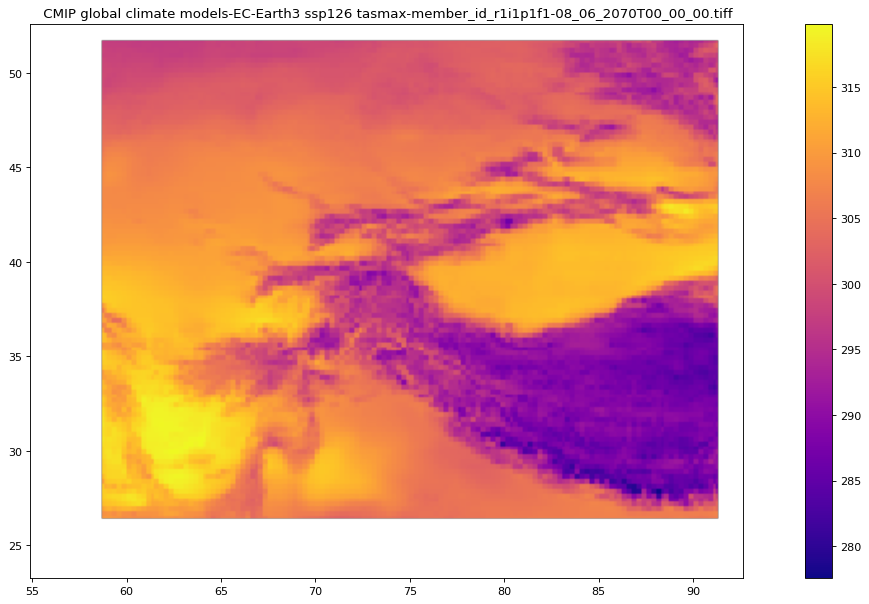

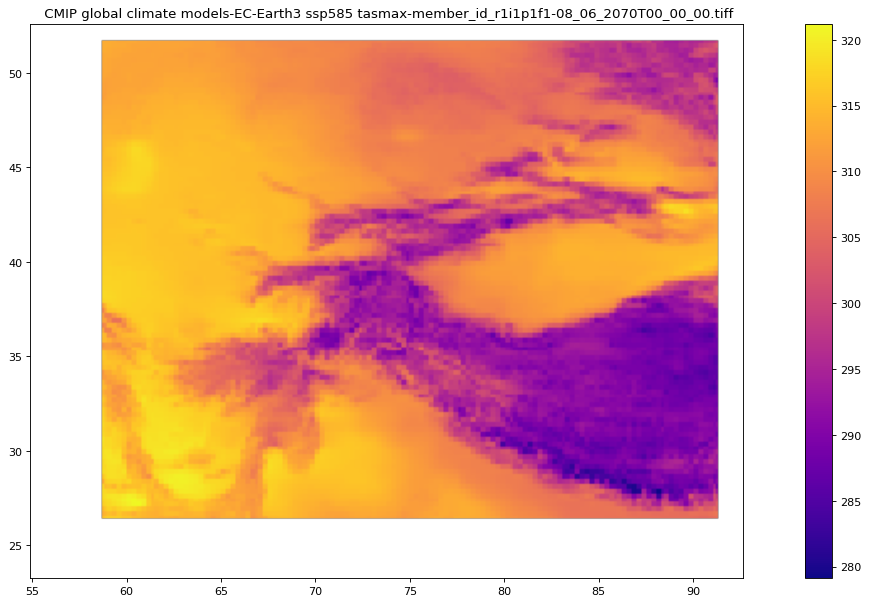

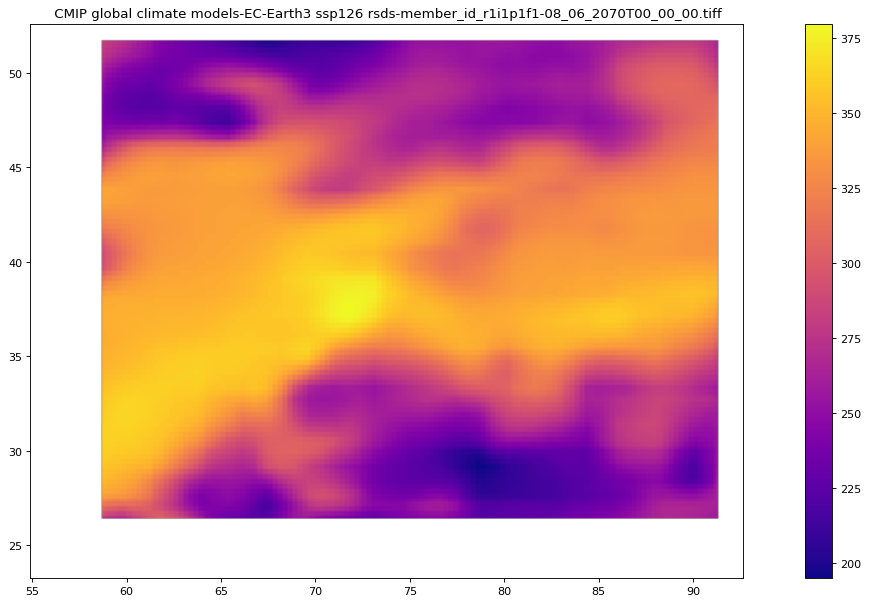

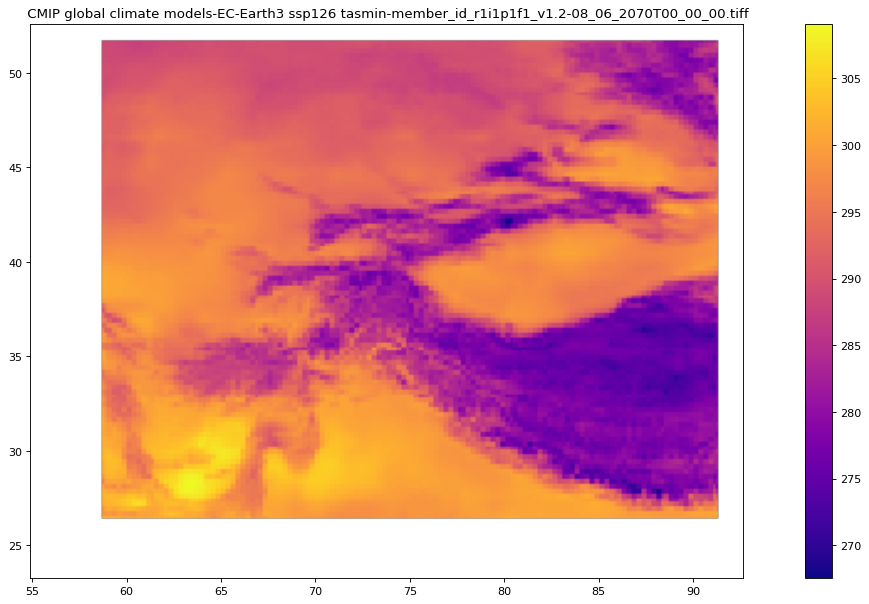

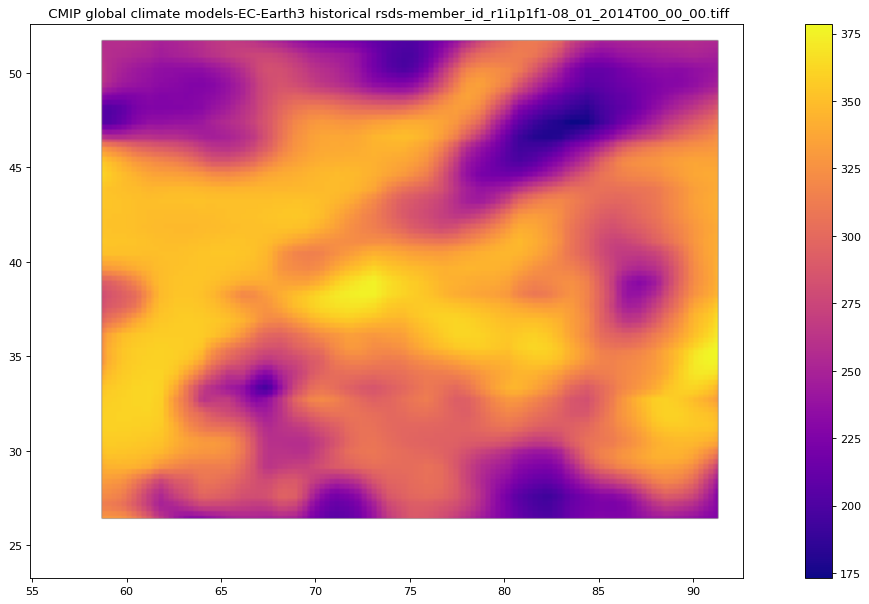

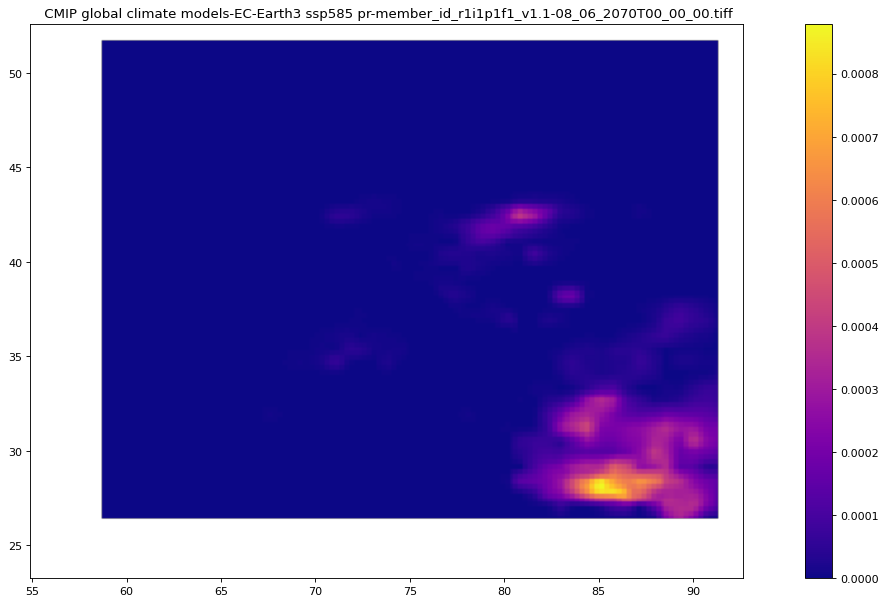

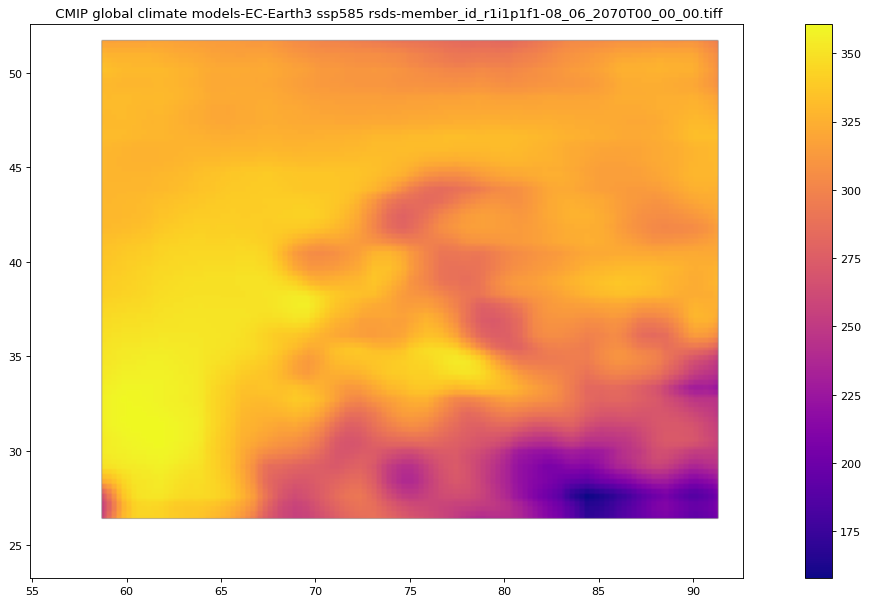

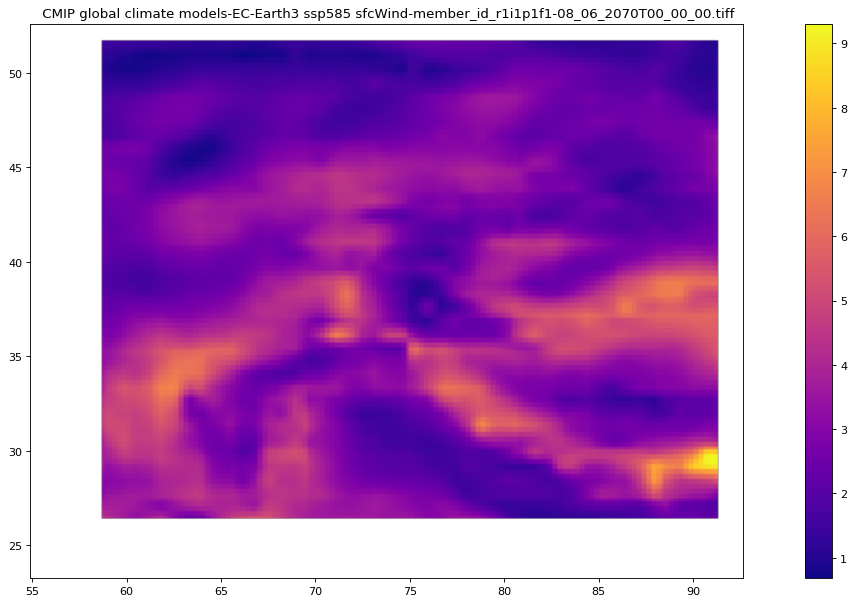

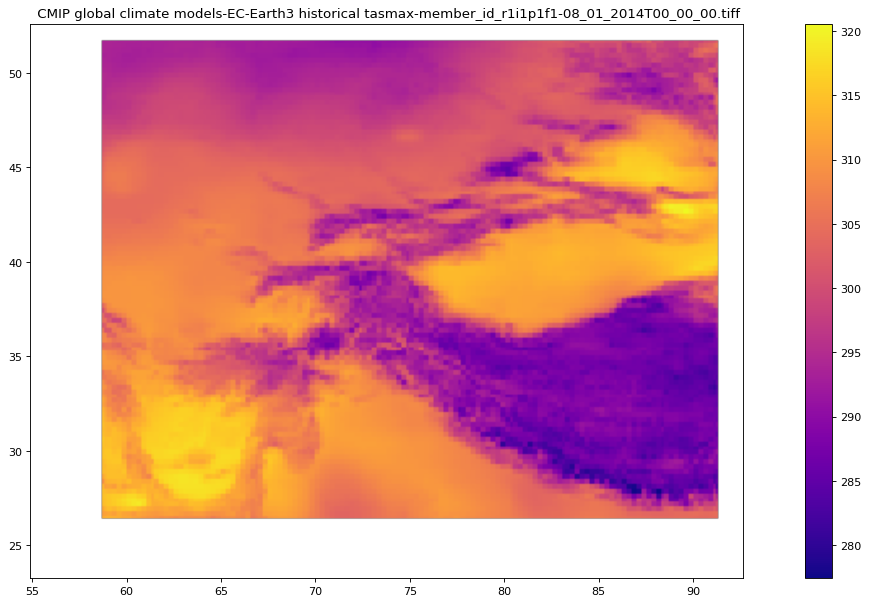

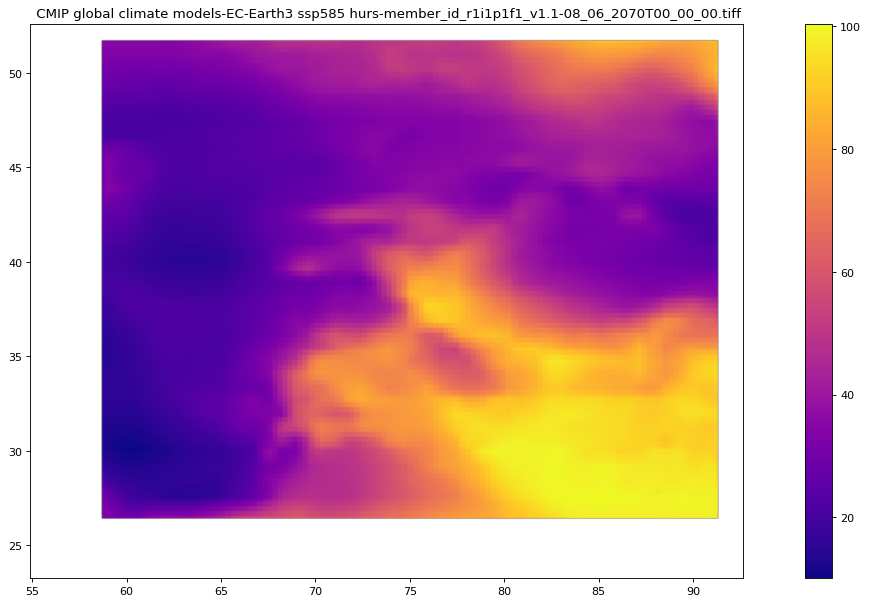

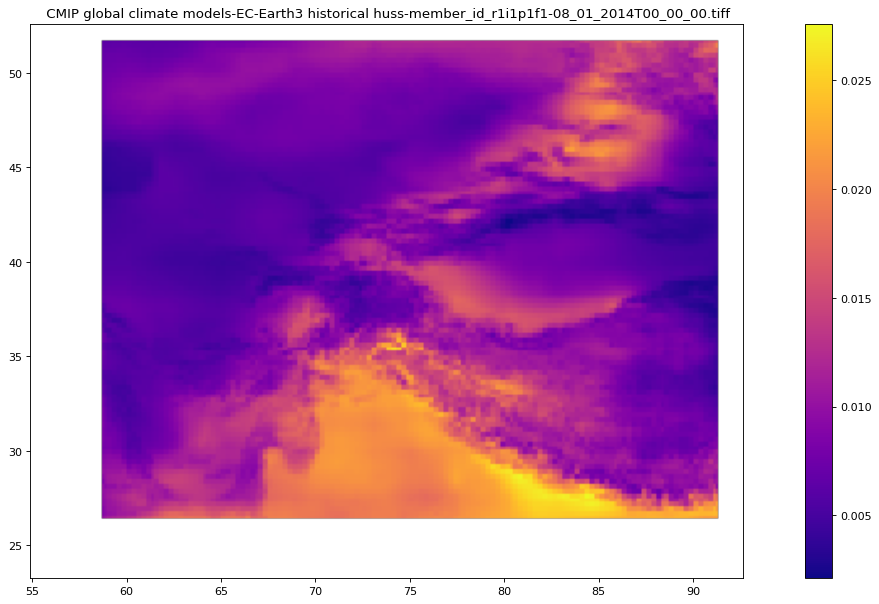

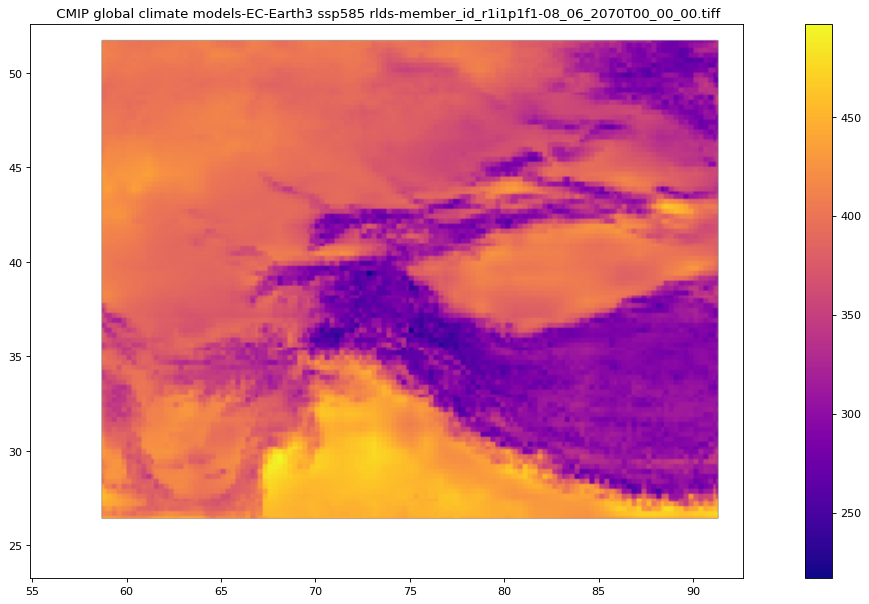

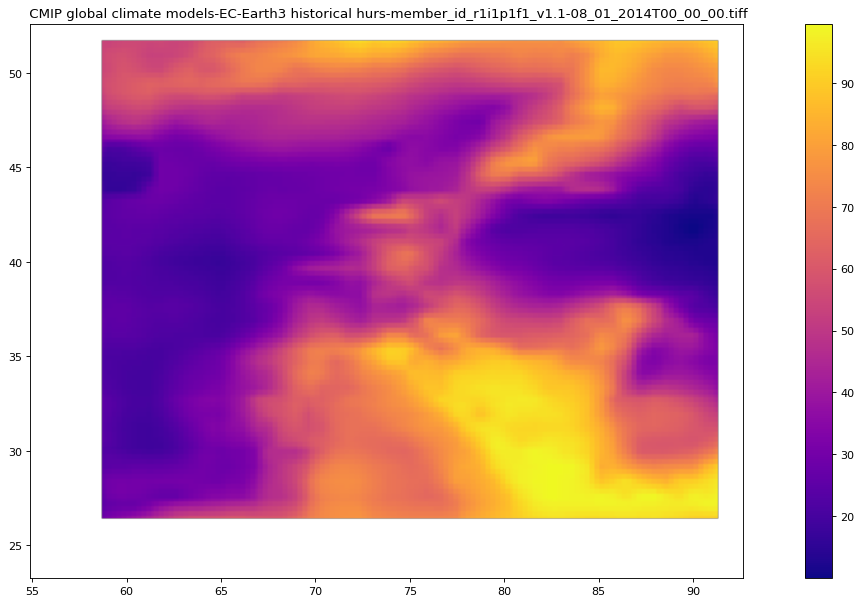

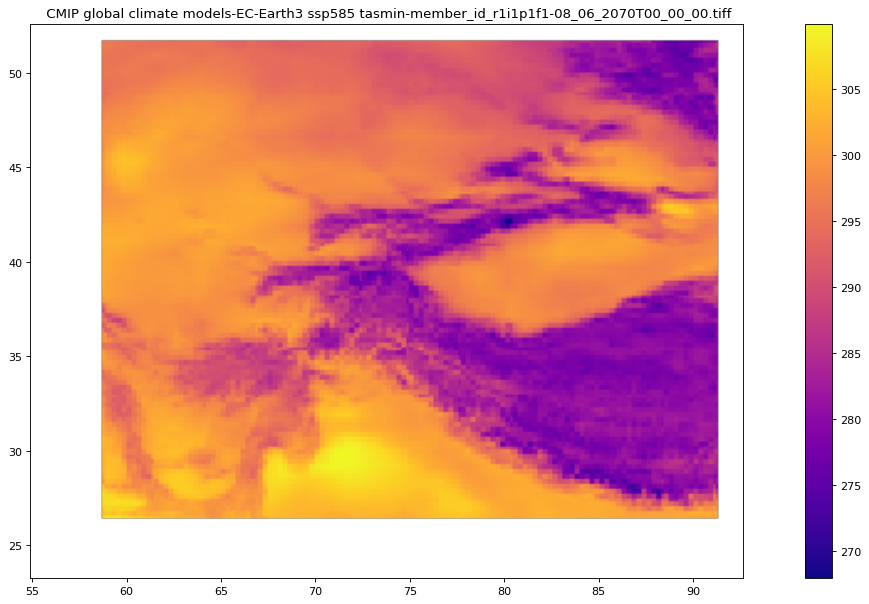

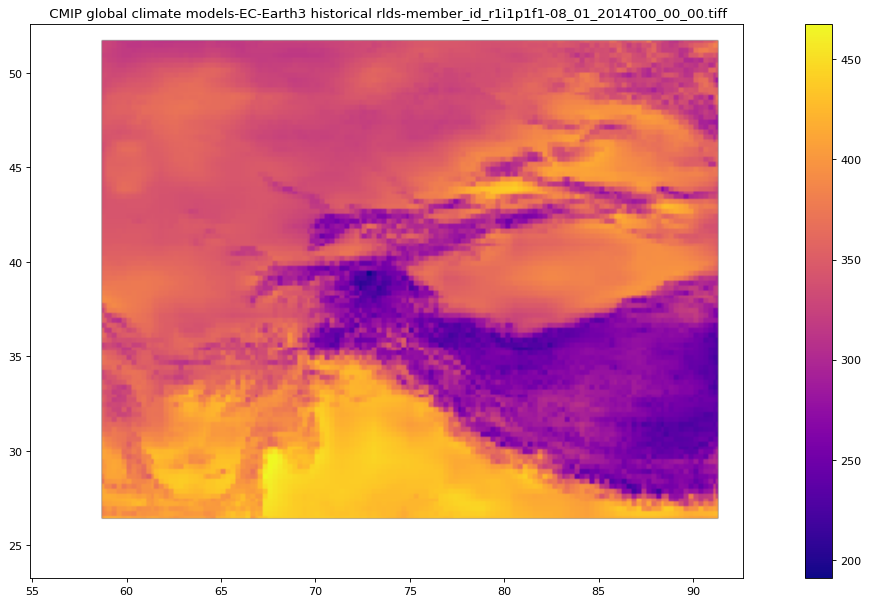

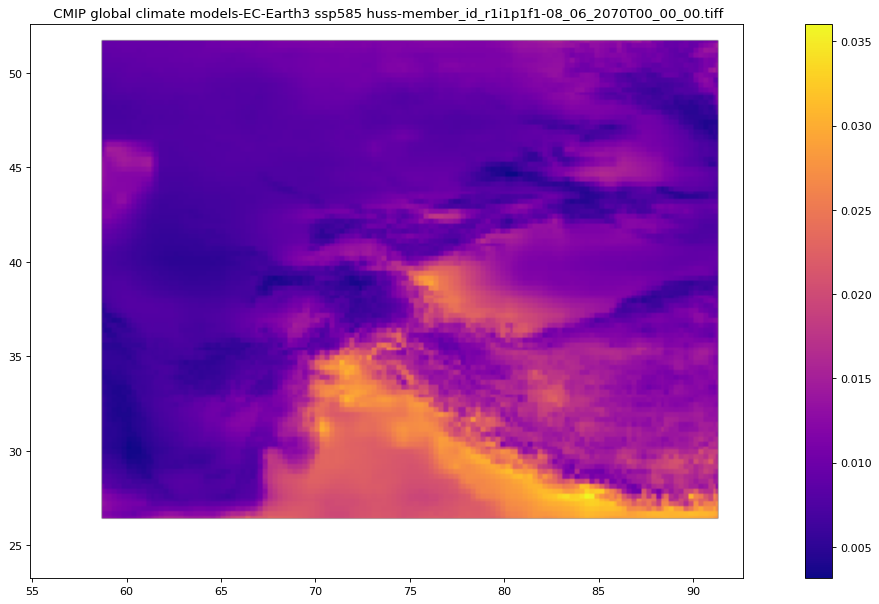

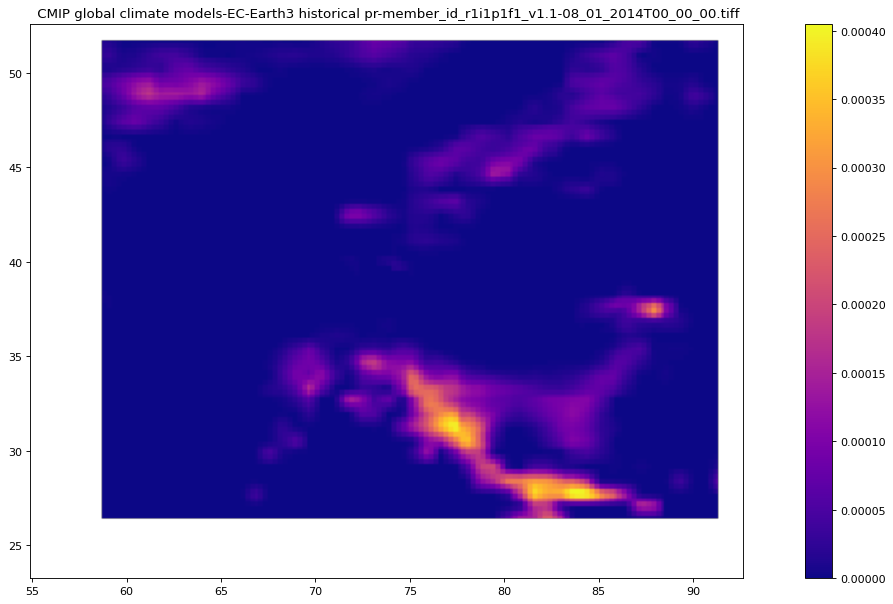

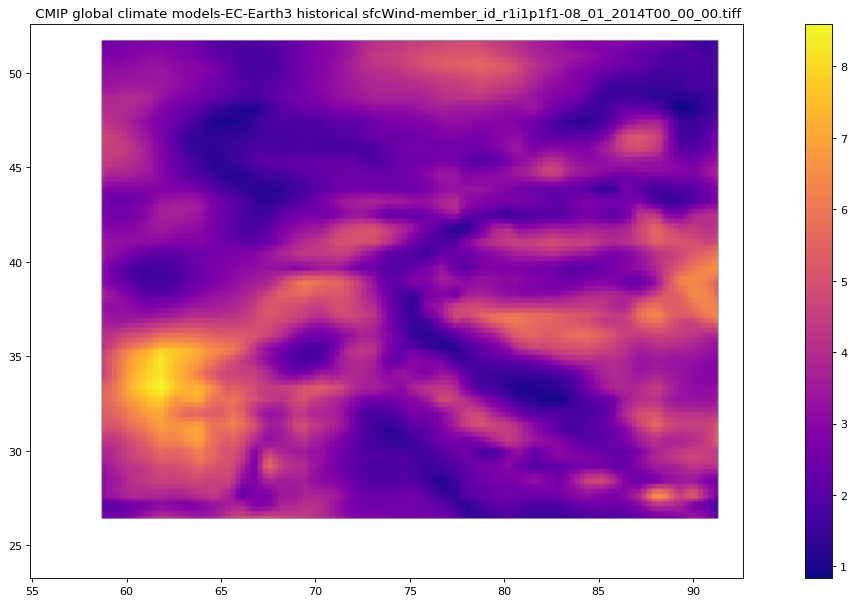

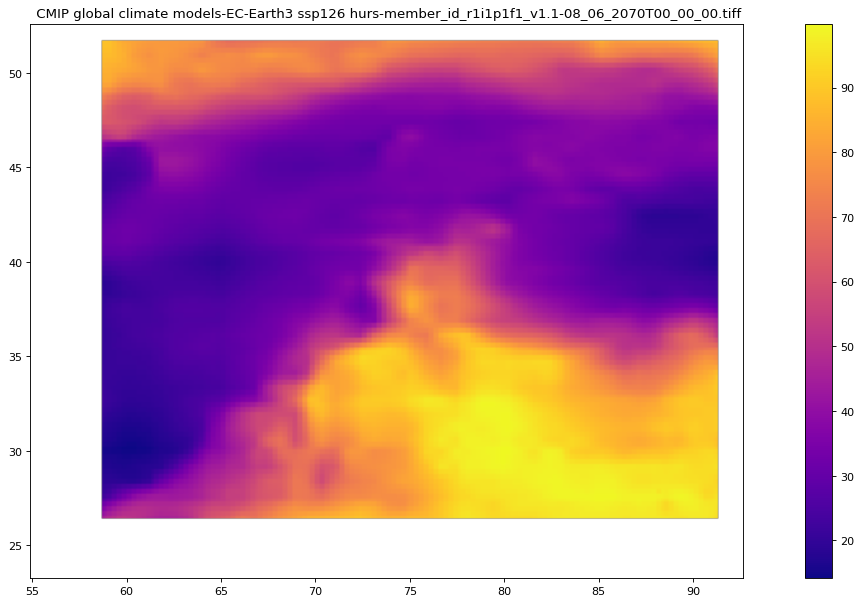

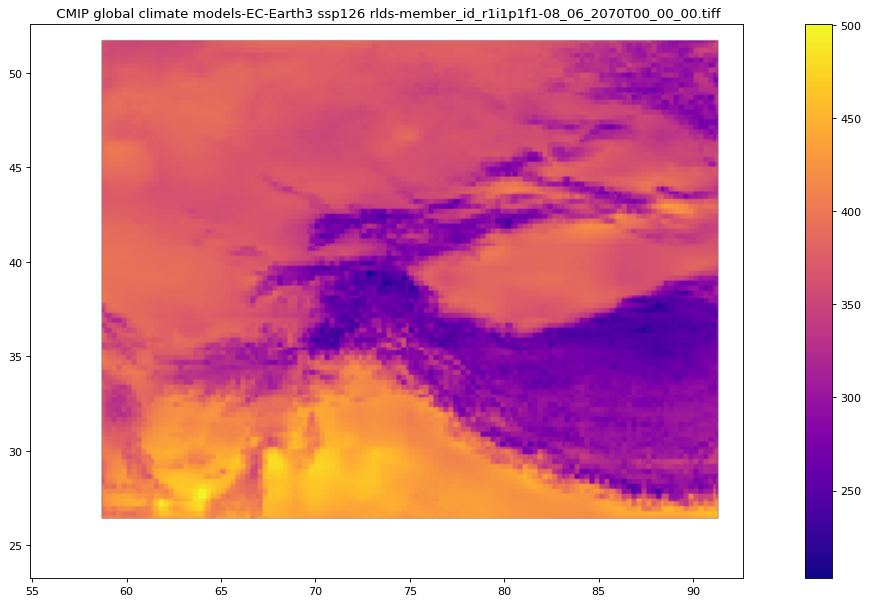

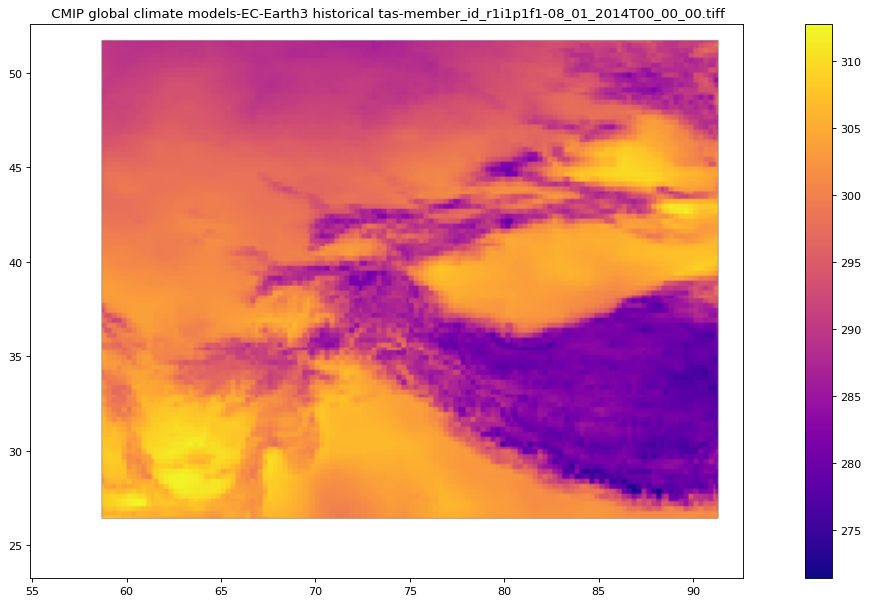

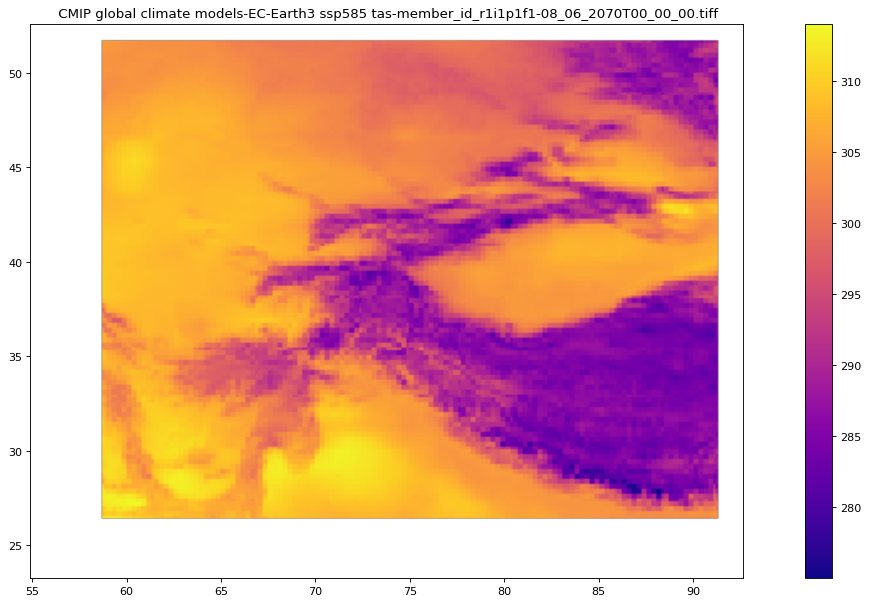

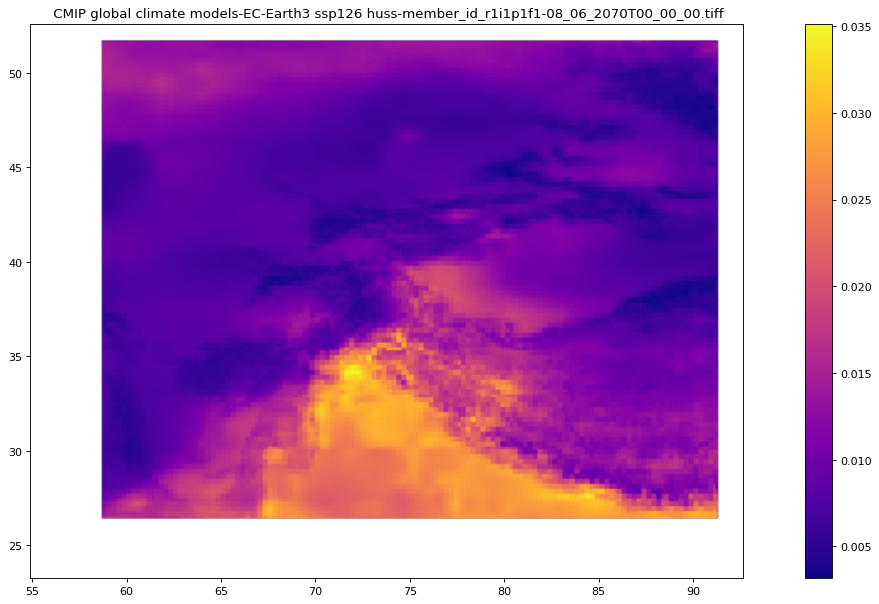

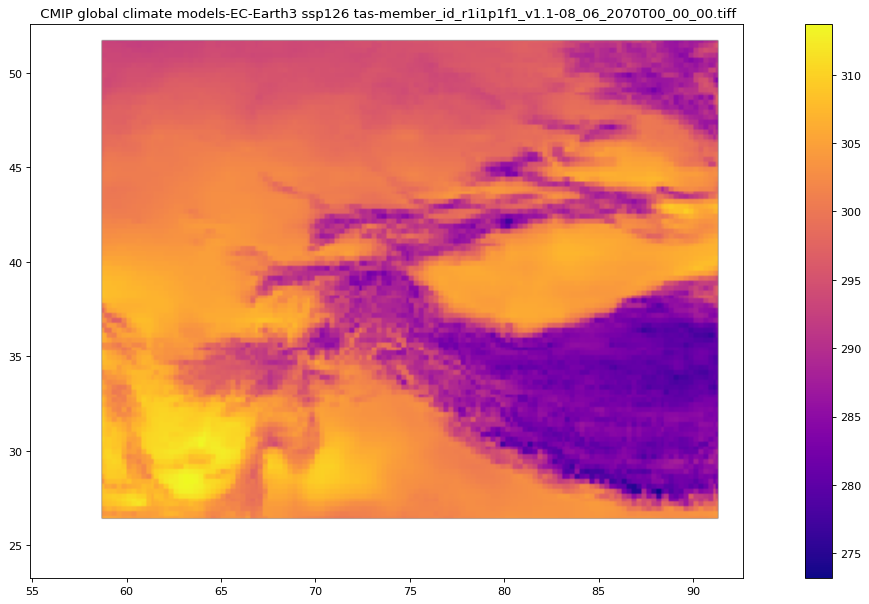

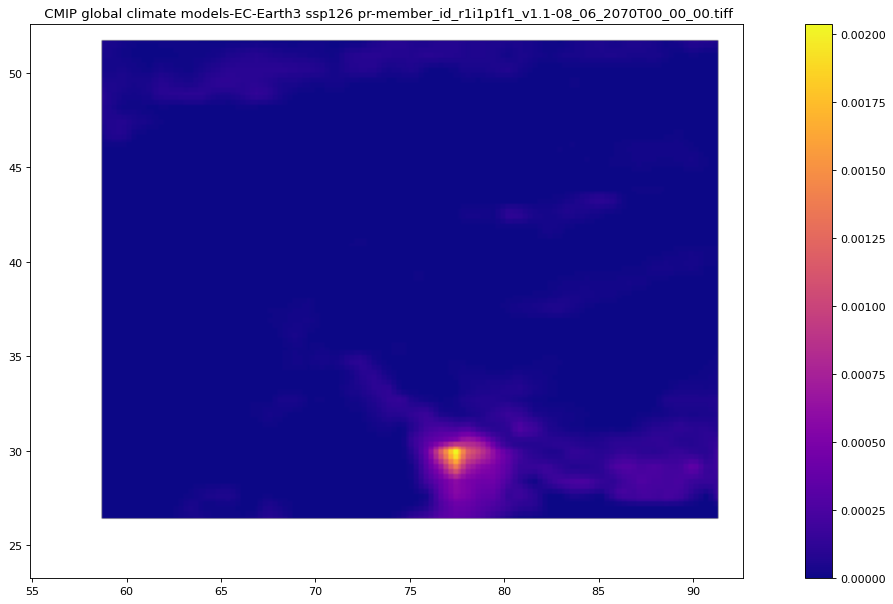

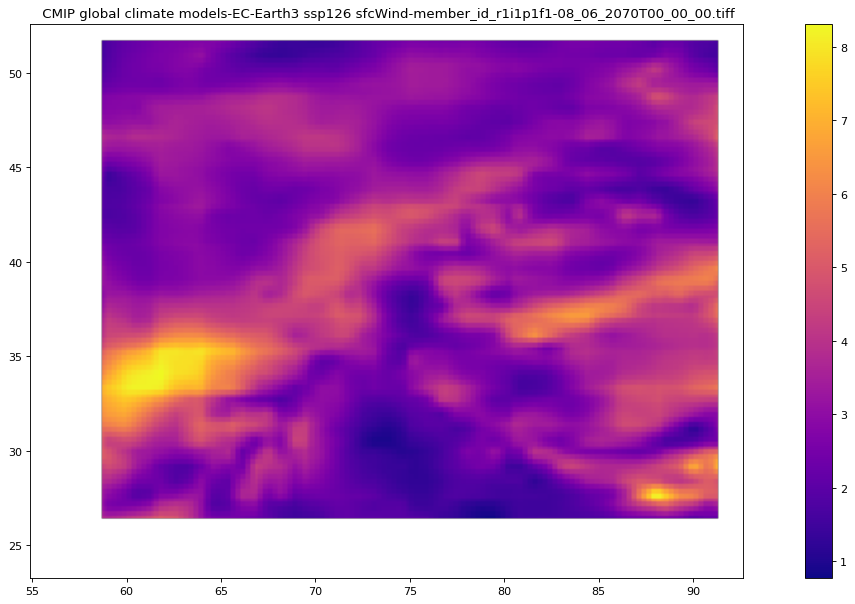

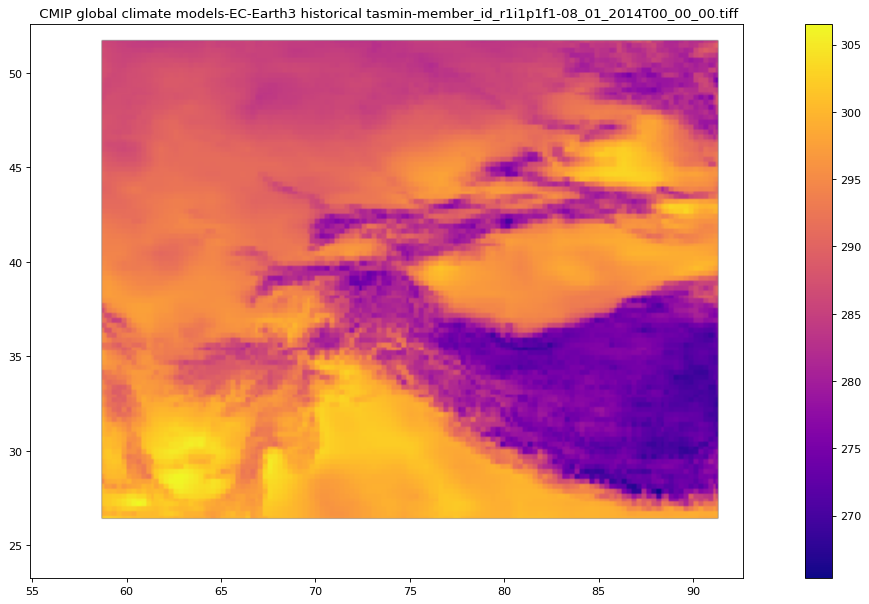

In [7]:
# Function to display the resulting Tiff(s).
cmip6_file_list = cmip6_result.list_files()
output_image_array = []
for file in cmip6_file_list:
    if file.endswith('.tiff'): #display the raster images
        with open(file+'.json', 'r') as summary_file:
            fileparms = json.load(summary_file)
        boundingBox=fileparms["boundingBox"]
        pixelStatistics=fileparms["rasterStatistics"]
        myextent=[boundingBox["minLongitude"],
                  boundingBox["maxLongitude"],
                  boundingBox["minLatitude"],
                  boundingBox["maxLatitude" ]]  
        array_cmip6 = np.array(PILImage.open(file))
        mask = (array_cmip6 == -9999)
        # Masked array to exclude NO Data points from plotting
        masked_array = np.ma.masked_array(array_cmip6, mask)
        plt.figure(figsize = (20, 9), dpi=80) # Sets the size and resolution of the plot
        plt.imshow(masked_array,
                   cmap = 'plasma',
                   vmin=pixelStatistics["pixelMin"],
                   vmax=pixelStatistics["pixelMax"],
                   extent = myextent) # Loads the raster data and sets the colormap
        plt.colorbar() # Adds the color bar
        plt.title(" "+os.path.basename(file))
        output_image_path = os.path.splitext(os.path.basename(file))[0] + ".png"
        plt.savefig(output_image_path, bbox_inches='tight')
        output_image_array.append(output_image_path)
        plt.close()

for output_image in output_image_array:
    #display the raster images
    display(Image(output_image,width=800, height=400))

Each of the images above represents information on different climate variables for the specified location and temporal period. The color gradient provides a visual representation of the magnitude and distribution of the climate data, making it easier to interpret regional differences and trends in climate conditions.




Below we are quering for graphical representation of tasmin(min temp),tasmax(max temp) and tas(avg temp) records for ssp126,ssp585 data over a year 2070 time interval and historical data over a year of 2014 time interval respectively.

The reason for including both the historical data from 2014 and the projected data for 2070 is to highlight the long-term changes in climate conditions. By comparing these two time points, we can observe how the data has shifted over time, particularly under different emissions scenarios.
This comparison helps demonstrate that the historical data (green line) generally shows lower values compared to both future scenarios, largely due to rising temperatures. However, it's important to note that not all changes follow this trend; some variables move in the opposite direction. This reflects the complexity and variability of climate projections, which are influenced by a wide range of interacting factors.

2025-04-21 16:13:35 - paw - INFO - TASK: submit_check_status_and_download STARTING.
2025-04-21 16:14:37 - paw - INFO - A real time point query is returned at the time of executing the Query.submit() method. The status is therefore complete. Skipping.
2025-04-21 16:14:37 - paw - INFO - The query download folder is set to the path /Users/ExternalRepoNew/Environmental-Intelligence/geospatial/samples/v3/datasets/global_climate_models_cmip6/download/.
2025-04-21 16:14:37 - paw - INFO - The online point query output was successfully saved to /Users/ExternalRepoNew/Environmental-Intelligence/geospatial/samples/v3/datasets/global_climate_models_cmip6/download/Comparison of Historical, SSP126 and SSP585 for year 2070 for a point in France.json.
2025-04-21 16:14:37 - paw - INFO - TASK: submit_check_status_and_download COMPLETED.
2025-04-21 16:14:37 - paw - INFO - TASK: submit_check_status_and_download STARTING.
2025-04-21 16:15:07 - paw - INFO - A real time point query is returned at the time of

layer_id                                      56504                   56506  \
layer_name                     EC-Earth3 ssp126 tas EC-Earth3 ssp126 tasmin   
dt         latitude  longitude                                                
2070-01-01 46.487854 2.076227             11.038782                7.872675   
2070-01-02 46.487854 2.076227              5.680322                2.589655   
2070-01-03 46.487854 2.076227              4.556970                2.290308   
2070-01-04 46.487854 2.076227              5.003564                2.525232   
2070-01-05 46.487854 2.076227              6.240808                2.355371   
...                                             ...                     ...   
2070-12-27 46.487854 2.076227              8.328760                5.809717   
2070-12-28 46.487854 2.076227              9.605310                8.122186   
2070-12-29 46.487854 2.076227             10.355127                9.092584   
2070-12-30 46.487854 2.076227              9.923364                8.230066   
2070-12-31 46.487854 2.076227              8.998285                6.358057   

layer_id                                         56507  \
layer_name                     EC-Earth3 ssp126 tasmax   
dt         latitude  longitude                           
2070-01-01 46.487854 2.076227                14.204919   
2070-01-02 46.487854 2.076227                 8.771021   
2070-01-03 46.487854 2.076227                 6.823663   
2070-01-04 46.487854 2.076227                 7.481927   
2070-01-05 46.487854 2.076227                10.126215   
...                                                ...   
2070-12-27 46.487854 2.076227                10.847833   
2070-12-28 46.487854 2.076227                11.088464   
2070-12-29 46.487854 2.076227                11.617700   
2070-12-30 46.487854 2.076227                11.616663   
2070-12-31 46.487854 2.076227                11.638513   

layer_id                                         56518                56519  \
layer_name                     EC-Earth3 ssp585 tasmin EC-Earth3 ssp585 tas   
dt         latitude  longitude                                                
2070-01-01 46.487854 2.076227                -0.068762             4.445947   
2070-01-02 46.487854 2.076227                 4.680139             6.902612   
2070-01-03 46.487854 2.076227                 3.622766             6.928979   
2070-01-04 46.487854 2.076227                 3.541284             6.186121   
2070-01-05 46.487854 2.076227                 3.645471             5.925073   
...                                                ...                  ...   
2070-12-27 46.487854 2.076227                 5.704767             9.328912   
2070-12-28 46.487854 2.076227                11.834131            12.826990   
2070-12-29 46.487854 2.076227                10.447900            11.109735   
2070-12-30 46.487854 2.076227                 8.898523             9.756616   
2070-12-31 46.487854 2.076227                 8.367761             9.956812   

layer_id                                         56521  
layer_name                     EC-Earth3 ssp585 tasmax  
dt         latitude  longitude                          
2070-01-01 46.487854 2.076227                 8.960657  
2070-01-02 46.487854 2.076227                 9.125116  
2070-01-03 46.487854 2.076227                10.235193  
2070-01-04 46.487854 2.076227                 8.830988  
2070-01-05 46.487854 2.076227                 8.204675  
...                                                ...  
2070-12-27 46.487854 2.076227                12.953058  
2070-12-28 46.487854 2.076227                13.819818  
2070-12-29 46.487854 2.076227                11.771570  
2070-12-30 46.487854 2.076227                10.614679  
2070-12-31 46.487854 2.076227                11.545862  

[365 rows x 6 columns]

layer_id                                          56510  \
layer_name                     EC-Earth3 historical tas   
dt_2070    latitude  longitude                            
2070-01-01 46.487854 2.076227                  5.930383   
2070-01-02 46.487854 2.076227                  3.679163   
2070-01-03 46.487854 2.076227                  5.908655   
2070-01-04 46.487854 2.076227                  6.080530   
2070-01-05 46.487854 2.076227                  9.012659   
...                                                 ...   
2070-12-27 46.487854 2.076227                 -4.922766   
2070-12-28 46.487854 2.076227                 -3.375983   
2070-12-29 46.487854 2.076227                 -0.933905   
2070-12-30 46.487854 2.076227                  0.510858   
2070-12-31 46.487854 2.076227                  1.772791   

layer_id                                             56511  \
layer_name                     EC-Earth3 historical tasmax   
dt_2070    latitude  longitude                               
2070-01-01 46.487854 2.076227                     9.702386   
2070-01-02 46.487854 2.076227                     7.647821   
2070-01-03 46.487854 2.076227                     8.759668   
2070-01-04 46.487854 2.076227                     8.114496   
2070-01-05 46.487854 2.076227                    11.227838   
...                                                    ...   
2070-12-27 46.487854 2.076227                    -1.665015   
2070-12-28 46.487854 2.076227                     1.013147   
2070-12-29 46.487854 2.076227                     3.487238   
2070-12-30 46.487854 2.076227                     3.676569   
2070-12-31 46.487854 2.076227                     6.019464   

layer_id                                             56512  
layer_name                     EC-Earth3 historical tasmin  
dt_2070    latitude  longitude                              
2070-01-01 46.487854 2.076227                     2.158380  
2070-01-02 46.487854 2.076227                    -0.289526  
2070-01-03 46.487854 2.076227                     3.057672  
2070-01-04 46.487854 2.076227                     4.046564  
2070-01-05 46.487854 2.076227                     6.797449  
...                                                    ...  
2070-12-27 46.487854 2.076227                    -8.180548  
2070-12-28 46.487854 2.076227                    -7.765112  
2070-12-29 46.487854 2.076227                    -5.355048  
2070-12-30 46.487854 2.076227                    -2.654852  
2070-12-31 46.487854 2.076227                    -2.473853  

[365 rows x 3 columns]

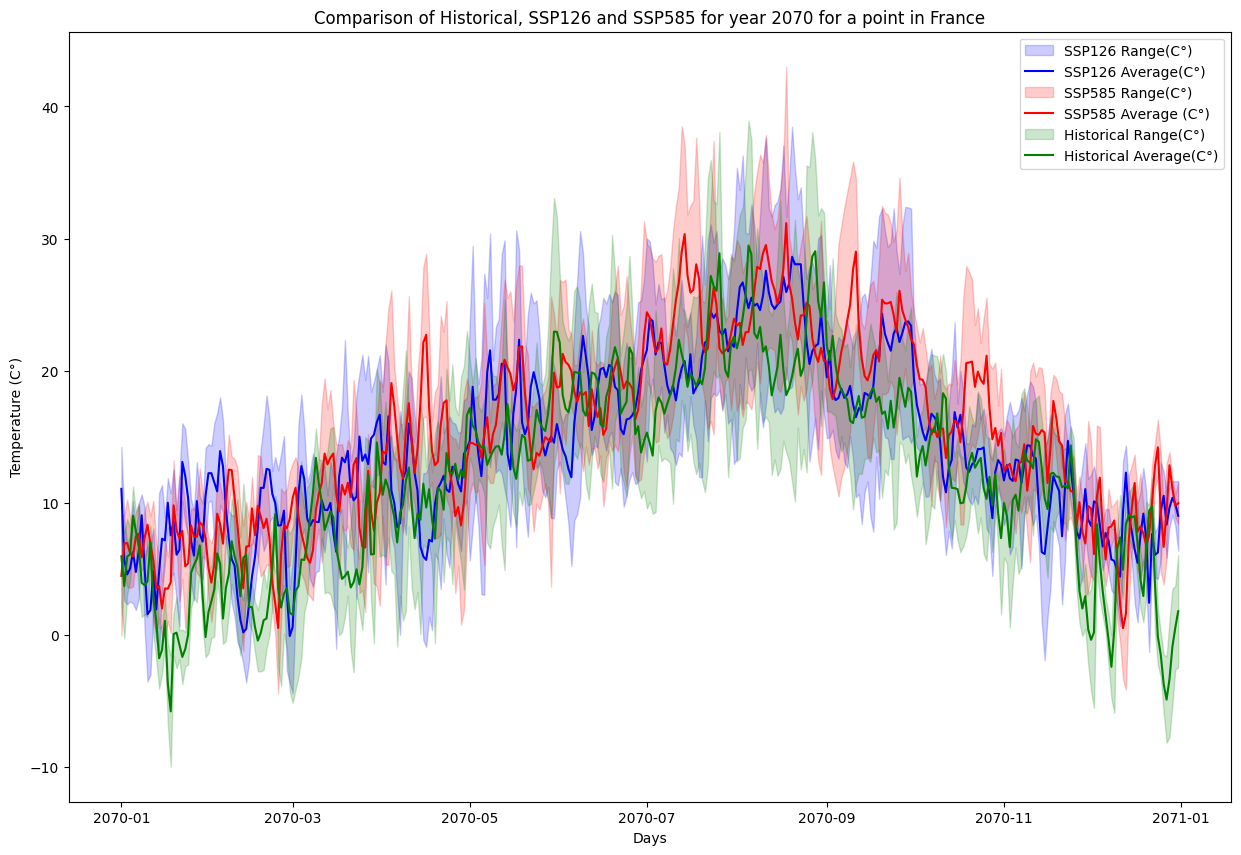

In [8]:
comparison_year='2070'
comparison_year_historical='2014'
location="France"
latlongs=[ 46.487854, 2.076227 ] 
query_name='Comparison of Historical, SSP126 and SSP585 for year 2070 for a point in France'
# query_name_historical='Comparison of Historical for year 2014 for a point in France'
cmip6_comparison = {'name': query_name, 
         'layers': [ { "type": "raster","id": "56504","dimensions": [{"name": "member_id", "value": "r1i1p1f1_v1.1" }] }, # EC-Earth3 ssp126 tas
                     { "type": "raster","id": "56506","dimensions": [{"name": "member_id", "value": "r1i1p1f1_v1.2" }] }, # EC-Earth3 ssp126 tasmin
                     { "type": "raster","id": "56507","dimensions": [{"name": "member_id", "value": "r1i1p1f1"      }] }, # EC-Earth3 ssp126 tasmax
                     
                     {"type": "raster", "id": "56518","dimensions": [{"name": "member_id", "value": "r1i1p1f1" }]}, #EC-Earth3 ssp585 tasmin
                     {"type": "raster", "id": "56519","dimensions": [{"name": "member_id", "value": "r1i1p1f1" }]}, #EC-Earth3 ssp585 tas 
                     {"type": "raster", "id": "56521","dimensions": [{"name": "member_id", "value": "r1i1p1f1" }]}, #EC-Earth3 ssp585 tasmax
                    ], 
                  'spatial': {'type': 'point', 'coordinates': latlongs },
                  'temporal': {'intervals': [{'start': comparison_year+'-01-01T00:00:00Z', 'end': comparison_year+'-12-31T00:00:00Z'}]}}

cmip6_comparison_historical = {'name': query_name, 
         'layers': [ {"type": "raster", "id": "56510","dimensions": [{"name": "member_id", "value": "r1i1p1f1" }]}, #EC-Earth3 historical tas
                     {"type": "raster", "id": "56511","dimensions": [{"name": "member_id", "value": "r1i1p1f1" }]}, #EC-Earth3 historical tasmax 
                     {"type": "raster", "id": "56512","dimensions": [{"name": "member_id", "value": "r1i1p1f1" }]}, #EC-Earth3 historical tasmin                    
                    ], 
                  'spatial': {'type': 'point', 'coordinates': latlongs },
                  'temporal': {'intervals': [{'start': comparison_year_historical+'-01-01T00:00:00Z', 'end': comparison_year_historical+'-12-31T00:00:00Z'}]}}

cmip6_query_result = query.submit_check_status_and_download(cmip6_comparison, client=EI_client_v3, verify=False)
cmip6_query_result_historical = query.submit_check_status_and_download(cmip6_comparison_historical, client=EI_client_v3, verify=False)
cmip6_df = cmip6_query_result.point_data_as_dataframe()
cmip6_df_historical = cmip6_query_result_historical.point_data_as_dataframe()
if 'timestamp' in cmip6_df.columns:
  cmip6_df['dt'] = pd.to_datetime(cmip6_df['timestamp'] * 1e6, errors='coerce')
cmip6_df['value']= pd.to_numeric(cmip6_df['value'],errors='coerce') - 273.15
display(cmip6_df.pivot(index=['dt','latitude','longitude'], columns=['layer_id','layer_name'], values='value')  ) 

if 'timestamp' in cmip6_df_historical.columns:
 cmip6_df_historical['dt'] = pd.to_datetime(cmip6_df_historical['timestamp'] * 1e6, errors='coerce')
cmip6_df_historical['dt_'+comparison_year] = cmip6_df_historical["dt"].apply(lambda x: x.replace(year=int(comparison_year)))
cmip6_df_historical['value']= pd.to_numeric(cmip6_df_historical['value'],errors='coerce') - 273.15
display(cmip6_df_historical.pivot(index=['dt_'+comparison_year,'latitude','longitude'], columns=['layer_id','layer_name'], values='value')  ) 
 
cmip6_dfs_pivoted = cmip6_df.pivot(index=['dt'], columns=['layer_id'], values='value')   #,'layer_name'
cmip6_dfs_pivoted_hist = cmip6_df_historical.pivot(index=['dt_'+comparison_year], columns=['layer_id'], values='value')   #,'layer_name'
# Chart creation
#plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(1, figsize=(15,10))
# draw area for SSP126
ax.fill_between(cmip6_dfs_pivoted.index, cmip6_dfs_pivoted[56506], cmip6_dfs_pivoted[56507], color='blue', alpha=0.2, label='SSP126 Range(C°)')
ax.plot(cmip6_dfs_pivoted.index, cmip6_dfs_pivoted[56504], color='blue', label='SSP126 Average(C°)')
# draw area for SSP585
ax.fill_between(cmip6_dfs_pivoted.index, cmip6_dfs_pivoted[56518], cmip6_dfs_pivoted[56521], color='red', alpha=0.2, label='SSP585 Range(C°)')
ax.plot(cmip6_dfs_pivoted.index, cmip6_dfs_pivoted[56519], color='red', label='SSP585 Average (C°)')
ax.set_title(query_name)

# draw area for historical
ax.fill_between(cmip6_dfs_pivoted_hist.index, cmip6_dfs_pivoted_hist[56512], cmip6_dfs_pivoted_hist[56511], color='green', alpha=0.2, label='Historical Range(C°)')
ax.plot(cmip6_dfs_pivoted_hist.index, cmip6_dfs_pivoted_hist[56510], color='green', label='Historical Average(C°)')
# # Add legend and labels
ax.legend()
plt.xlabel('Days')
plt.ylabel('Temperature (C°)')
plt.show()

## References
- https://www.carbonbrief.org/cmip6-the-next-generation-of-climate-models-explained/
- https://www.wcrp-climate.org/wgcm-cmip/cmip-video
- https://wcrp-cmip.org/cmip6/